# ASELSAN Stock Prices
Aim of the project to create a ML model which will predict the stock prices.

# DataSet
I have Downloaded this dataset from kaggle website. Here is the link: https://www.kaggle.com/datasets/zlemglsmklkaya/aselsan-stock-prices-20172022

# What are we required to do
We have to create a ML model which will predict the stock prices.

# Importing the Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.linear_model import  LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor

In [4]:
df=pd.read_csv("ASELSAN-2017-2022.csv")

In [5]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-15,11.00,11.06,10.92,11.03,10.695765,7122628
1,2017-06-16,11.03,11.08,10.92,10.92,10.589099,7462226
2,2017-06-19,10.95,10.97,10.90,10.90,10.569703,4526662
3,2017-06-20,10.92,10.97,10.84,10.85,10.521218,4386578
4,2017-06-21,10.86,11.04,10.77,10.99,10.656976,9809562
5,2017-06-22,11.04,11.05,10.96,11.04,10.705461,6070406
6,2017-06-23,11.06,11.08,11.01,11.01,10.676370,5910942
7,2017-06-26,11.01,11.01,11.01,11.01,10.676370,0
8,2017-06-27,11.01,11.01,11.01,11.01,10.676370,0
9,2017-06-28,11.03,11.06,10.97,11.00,10.666673,5777618


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1272,2022-06-08,24.760000,24.860001,23.260000,23.379999,23.379999,49666928
1273,2022-06-09,23.379999,23.740000,23.100000,23.700001,23.700001,39632815
1274,2022-06-10,23.459999,23.660000,23.160000,23.240000,23.240000,34396977
1275,2022-06-13,23.059999,23.340000,22.780001,22.799999,22.799999,27008184
1276,2022-06-14,22.900000,23.459999,22.820000,23.280001,23.280001,40895641


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1277 non-null   object 
 1   Open       1277 non-null   float64
 2   High       1277 non-null   float64
 3   Low        1277 non-null   float64
 4   Close      1277 non-null   float64
 5   Adj Close  1277 non-null   float64
 6   Volume     1277 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 70.0+ KB


In [8]:
df.shape

(1277, 7)

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1.277000e+03
mean,14.828919,15.058567,14.602960,14.805145,14.561478,3.663917e+07
std,4.160610,4.264221,4.061145,4.141082,4.201777,3.082362e+07
min,8.255000,8.350000,8.230000,8.300000,8.088128,0.000000e+00
25%,11.840000,12.000000,11.730000,11.840000,11.500733,1.525273e+07
50%,14.560000,14.820000,14.330000,14.540000,14.331708,2.859678e+07
75%,16.770000,17.040001,16.570000,16.740000,16.523008,4.841977e+07
max,28.600000,29.059999,27.920000,28.520000,28.520000,2.953460e+08


# Changing of Data Type to String and then to Int

In [10]:
df['Date'] = df['Date'].astype(str).str.replace('-', '')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1277 non-null   object 
 1   Open       1277 non-null   float64
 2   High       1277 non-null   float64
 3   Low        1277 non-null   float64
 4   Close      1277 non-null   float64
 5   Adj Close  1277 non-null   float64
 6   Volume     1277 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 70.0+ KB


In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,20170615,11.00,11.06,10.92,11.03,10.695765,7122628
1,20170616,11.03,11.08,10.92,10.92,10.589099,7462226
2,20170619,10.95,10.97,10.90,10.90,10.569703,4526662
3,20170620,10.92,10.97,10.84,10.85,10.521218,4386578
4,20170621,10.86,11.04,10.77,10.99,10.656976,9809562


In [13]:
df['Date'] = df['Date'].astype('int')

In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,20170615,11.00,11.06,10.92,11.03,10.695765,7122628
1,20170616,11.03,11.08,10.92,10.92,10.589099,7462226
2,20170619,10.95,10.97,10.90,10.90,10.569703,4526662
3,20170620,10.92,10.97,10.84,10.85,10.521218,4386578
4,20170621,10.86,11.04,10.77,10.99,10.656976,9809562


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1277 non-null   int32  
 1   Open       1277 non-null   float64
 2   High       1277 non-null   float64
 3   Low        1277 non-null   float64
 4   Close      1277 non-null   float64
 5   Adj Close  1277 non-null   float64
 6   Volume     1277 non-null   int64  
dtypes: float64(5), int32(1), int64(1)
memory usage: 65.0 KB


In [16]:
Date=[int(x) for x in df.Date]
df['Date']=Date

# Changing the Data type to Timestamp

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1277 non-null   datetime64[ns]
 1   Open       1277 non-null   float64       
 2   High       1277 non-null   float64       
 3   Low        1277 non-null   float64       
 4   Close      1277 non-null   float64       
 5   Adj Close  1277 non-null   float64       
 6   Volume     1277 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 70.0 KB


In [19]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-15,11.00,11.06,10.92,11.03,10.695765,7122628
1,2017-06-16,11.03,11.08,10.92,10.92,10.589099,7462226
2,2017-06-19,10.95,10.97,10.90,10.90,10.569703,4526662
3,2017-06-20,10.92,10.97,10.84,10.85,10.521218,4386578
4,2017-06-21,10.86,11.04,10.77,10.99,10.656976,9809562


# Changing the Index to Date

In [20]:
df.index=df.Date

In [21]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-06-15,2017-06-15,11.00,11.06,10.92,11.03,10.695765,7122628
2017-06-16,2017-06-16,11.03,11.08,10.92,10.92,10.589099,7462226
2017-06-19,2017-06-19,10.95,10.97,10.90,10.90,10.569703,4526662
2017-06-20,2017-06-20,10.92,10.97,10.84,10.85,10.521218,4386578
2017-06-21,2017-06-21,10.86,11.04,10.77,10.99,10.656976,9809562


# Deleting the "Date" Column

In [22]:
df.drop("Date",axis=1,inplace=True)

In [23]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-15,11.00,11.06,10.92,11.03,10.695765,7122628
2017-06-16,11.03,11.08,10.92,10.92,10.589099,7462226
2017-06-19,10.95,10.97,10.90,10.90,10.569703,4526662
2017-06-20,10.92,10.97,10.84,10.85,10.521218,4386578
2017-06-21,10.86,11.04,10.77,10.99,10.656976,9809562


# Visualisation of Data

Text(0, 0.5, 'Open')

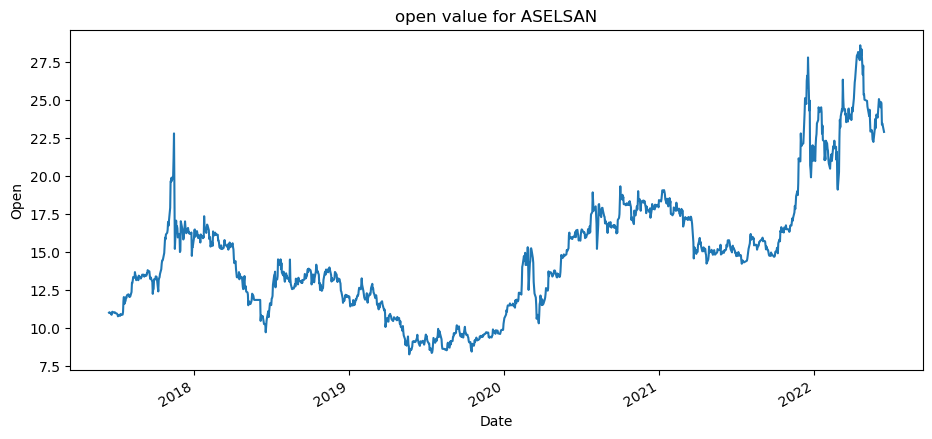

In [24]:
plt.figure(figsize=(11,5))
df.Open.plot()
plt.title("open value for ASELSAN")
plt.ylabel("Open")

<AxesSubplot:>

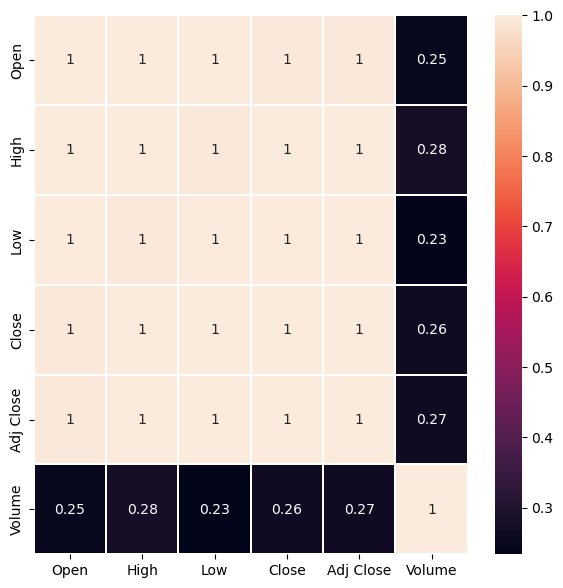

In [27]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1)

<AxesSubplot:xlabel='Date'>

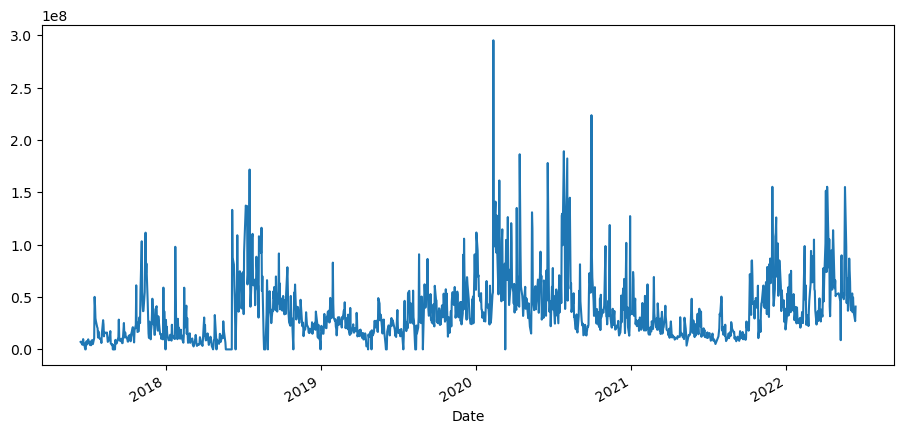

In [28]:
plt.figure(figsize=(11,5))
df.Volume.plot()

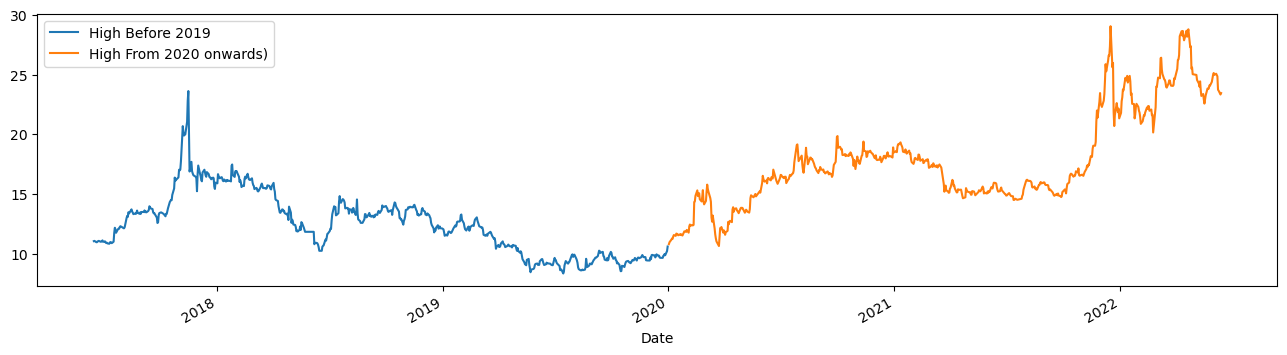

In [29]:
df["High"][:'2019'].plot(figsize=(16,4),legend=True)
df["High"]['2020':].plot(figsize=(16,4),legend=True)
plt.legend(['High Before 2019','High From 2020 onwards)'])

# Creating the Model and Prediction of Price

In [30]:
 y,x=df.High,df.drop("High",axis=1)

In [31]:
ytrain=np.array(y[:'2019'])
ytest=np.array(y["2020":])
xtrain=np.array(x[:"2019"])
xtest=np.array(x["2020":])

In [32]:
def plot_model(test,pred):
    plt.plot(test, color='red',label='ASELSAN Stock Price')
    plt.plot(pred, color='blue',label='pred ASELSAN stock Price')
    plt.title('ASELSAN Prediction')
    plt.xlabel('Time')
    plt.ylabel('cfars')
    plt.legend()
    plt.show()

In [33]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred_lr=lr.predict(xtest)

ridge=Ridge(alpha=5)
ridge.fit(xtrain,ytrain)
ypred_ridge=ridge.predict(xtest)

lasso=Lasso(alpha=5)
lasso.fit(xtrain,ytrain)
ypred_lasso=ridge.predict(xtest)

dtr=DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=7)
dtr.fit(xtrain,ytrain)
ypred_dtr=dtr.predict(xtest)

C:\Users\Vineeth Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.19997e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Vineeth Reddy\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [34]:
list_model=[lr,ridge,lasso,dtr]
for model in list_model:
    score_train=model.score(xtrain,ytrain)
    score_test=model.score(xtest,ytest)
    print("score train is ",score_train,"score test is ",score_test)

score train is  0.9977355913055623 score test is  0.9974141105171601
score train is  0.9974748190862605 score test is  0.996102686830086
score train is  0.37570241510607505 score test is  -0.7123328357612497
score train is  0.9993030815351327 score test is  0.8567217734917343


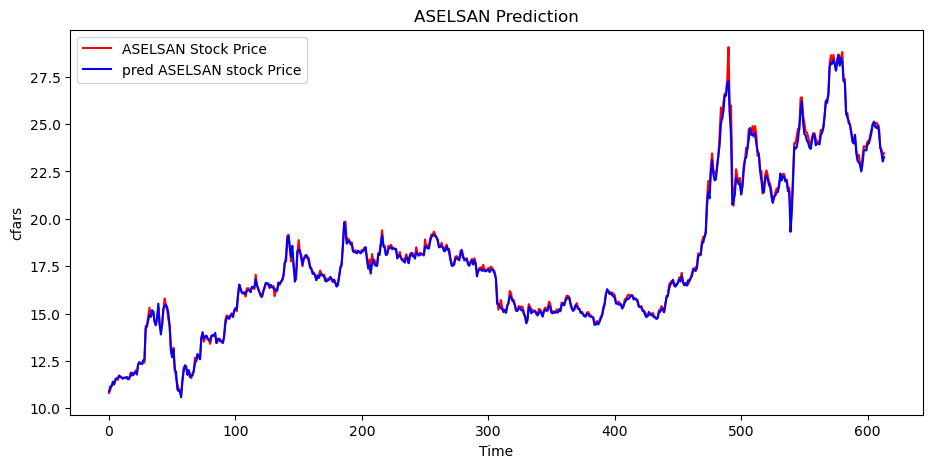

In [35]:
plt.figure(figsize=(11,5))
plot_model(ytest.reshape(-1,1),ypred_lr.reshape(-1,1))

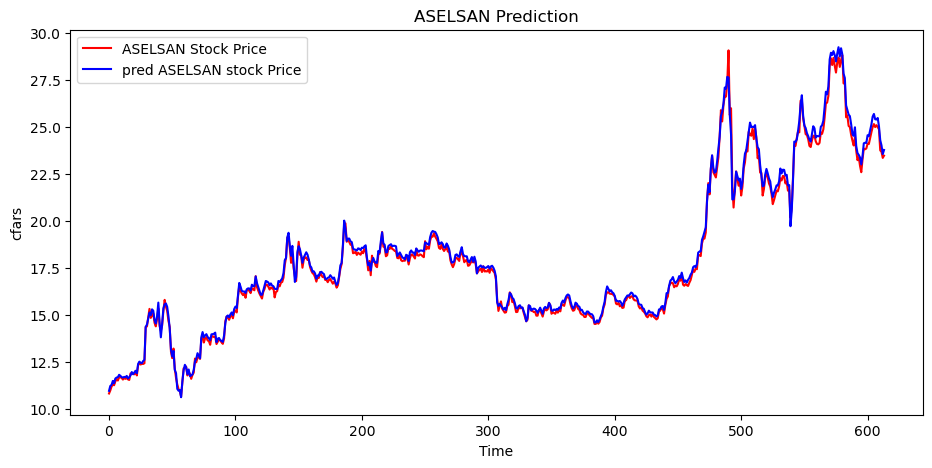

In [36]:
plt.figure(figsize=(11,5))
plot_model(ytest.reshape(-1,1),ypred_ridge.reshape(-1,1))

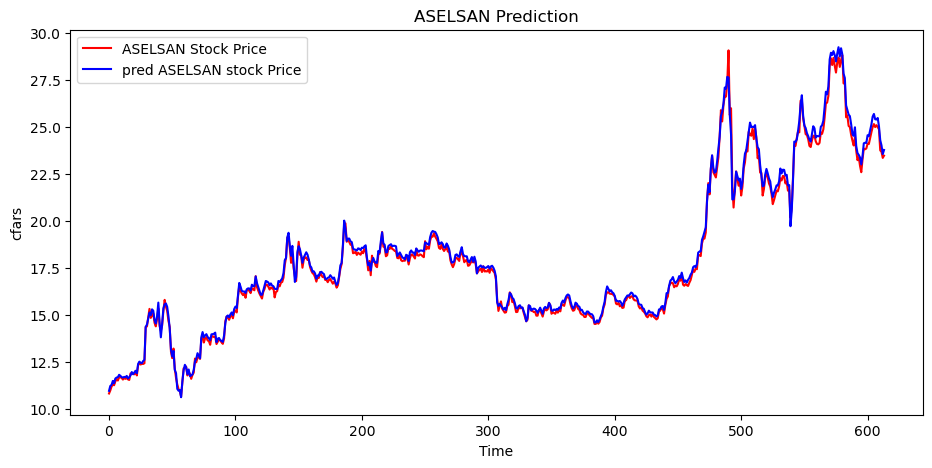

In [37]:
plt.figure(figsize=(11,5))
plot_model(ytest.reshape(-1,1),ypred_lasso.reshape(-1,1))

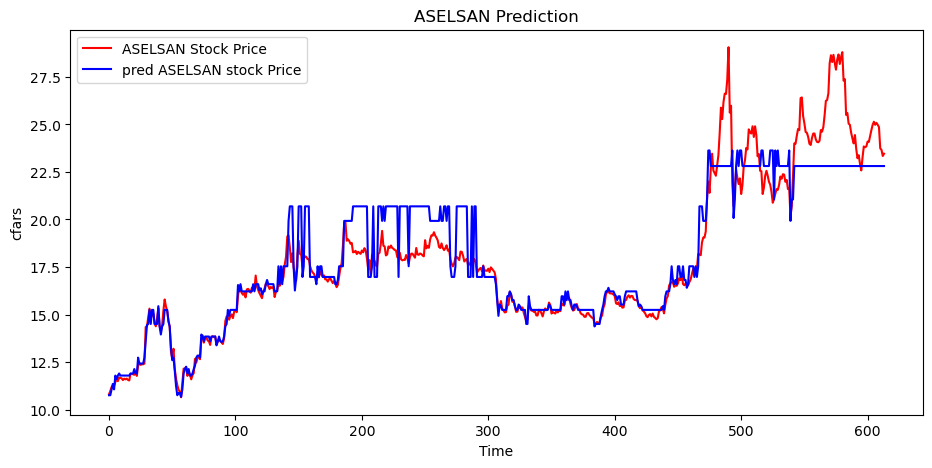

In [38]:
plt.figure(figsize=(11,5))
plot_model(ytest.reshape(-1,1),ypred_dtr.reshape(-1,1))

# Conclusion 
- The variation of Opening Price of "ASELSAN" with Date is plotted.
- Heatmap of "ASELSAN" is shown.
- The decrease in opening price in 2018 to 2020 and the increase from 2020 to 2022 is plotted.
- ASELSAN stock price prediction is done using ML Model.